#THE SPARKS FOUNDATION - Data Science and Business Analytics Internship
##Author : Shifana Rahman
##Email  : shifanarahman007@gmail.com
##Batch  : GRIP March 2022
##TASK 2 - Prediction using Unsupervised Machine Learning

In [11]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

#visdgualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
#Loading data from csv
df = pd.read_csv('Iris.csv')



###DATA DESCRIPTION


In [ ]:
df.head()

In [13]:
df.shape

(150, 6)

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
#Pre processing using Min max scaler
Scaler = MinMaxScaler()
Scale = Scaler.fit_transform(df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']])
df_scale = pd.DataFrame(Scale, columns = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']);
df_scale.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


###USING THE ELBOW METHOD TO FIND THE OPTIMUM NUMBER OF CLUSTERS

In [17]:

wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']])
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'The elbow method')

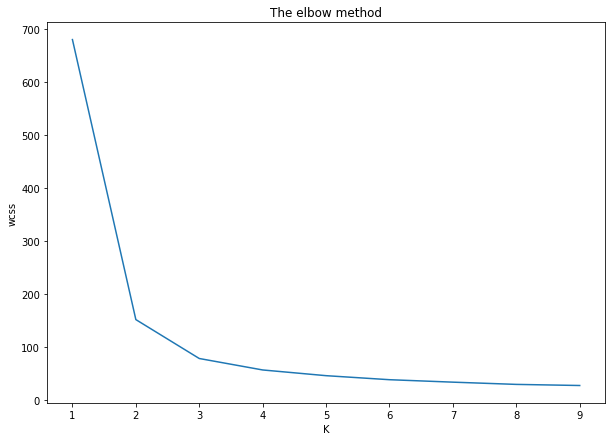

In [18]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.xlabel('K')
plt.ylabel('wcss')
plt.plot(k_rng, wcss)
plt.title('The elbow method')

###From the above graph we can see that optimum number of clusters is **3**

#Applying kmeans with 3 clusters (K=3)

In [19]:
kmeans=KMeans(n_clusters=3, init= 'k-means++',random_state=70)
y_kmeans = kmeans.fit_predict(df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']])
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [20]:
df['cluster']=y_kmeans
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
X = df.iloc[:,1:-1].values

##Visualizing the cluster by plotting the value and centroids on scatter plot

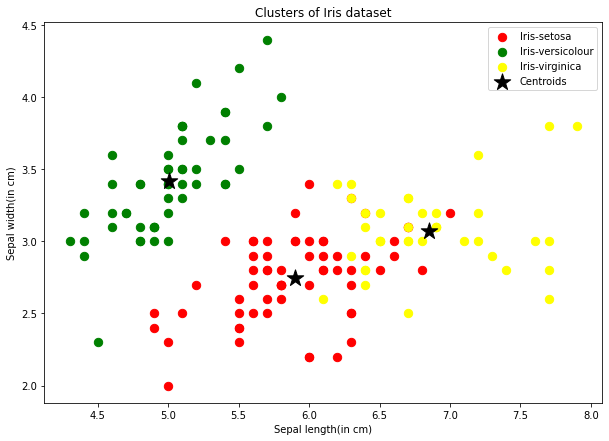

In [26]:
#Visualizing the first two columns (sepal length and sepal width)
plt.rcParams['figure.figsize'] = [10, 7]
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=70, c='red', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=70, c='green', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=70, c='yellow', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='black', marker='*', label='Centroids')
plt.title('Clusters of Iris dataset')
plt.xlabel('Sepal length(in cm)')
plt.ylabel('Sepal width(in cm)')
plt.legend()
plt.show()

 

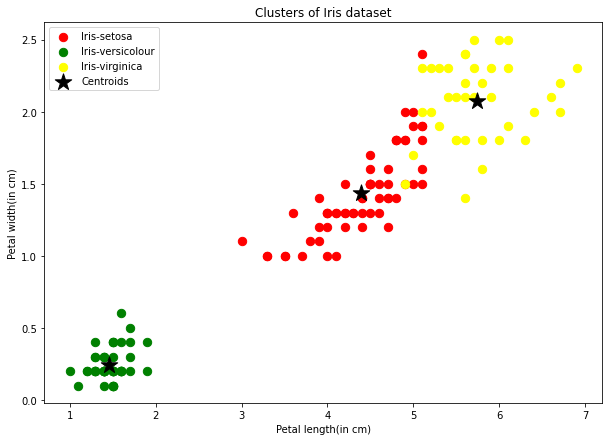

In [ ]:
#Visualizing the next two columns (petal length and petal width)
plt.rcParams['figure.figsize'] = [10, 7]
plt.scatter(X[y_kmeans == 0,2], X[y_kmeans == 0,3], s=70, c='red', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,2], X[y_kmeans == 1,3], s=70, c='green', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2,2], X[y_kmeans == 2,3], s=70, c='yellow', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], s=300, c='black', marker='*', label='Centroids')
plt.title('Clusters of Iris dataset')
plt.xlabel('Petal length(in cm)')
plt.ylabel('Petal width(in cm)')
plt.legend()
plt.show()

 

##The conclusion is that from the given iris data set, clusters have been formed with the helps of ELBOW CURVE and K-Means and they have been visualized in the scatter plot along with centroids.